# 웹크롤링(Web Crawling) 기초(복습)
* 웹 크롤링은 인터넷에서 특정 웹사이트나 웹페이지의 데이터를 자동으로 수집하는 기술
* 프로그램을 사용하여 웹페이지를 방문하고, HTML 문서, 텍스트, 이미지, 또는 기타 데이터를 추출하여 저장하는 방식으로 이루어짐
* 활용분야: 최신 뉴스 자동 수집, 전자상거래 웹사이트에서 상품 정보(가격, 리뷰, 상품 등) 수집, 데이터 분석을 포함


### 웹 크롤링의 주요 절차(복습)

1. 요청(Request): 데이터를 수집하고 싶은 웹사이트에 **접근 허락 요청**을하고, **가공되지 않은 HTML 코드(데이터)를** 가져옴
* requests 라이브러리가 사용

2. 파싱(Parsing): 가공되지 않은 HTML 코드를 **원하는 조건으로 탐색하고 추출할 수 있는 HTML 코드로 변환**하고, 그 코드에서 원하는 태그와 관련 데이터를 추출
* BeautifulSoup 같은 라이브러리를 활용
* for문, find_all() 함수,find()함수를 사용

3. 데이터 저장: 추출한 데이터를 Pandas의 **데이터프레임(엑셀과 유사)으로 저장**
* Pandas 라이브러리를 이용하고, 그 데이터프레임을 **CSV 파일 형식으로 변환**해서 내드라이브의 폴더(예, mypython)으로 저장하는 방식이 일반적

### 구글 드라이브 마운트 먼저 실행

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### 간단한 Python 웹 크롤링 예시
1. 요청
2. 파싱
3. 원하는 태그와 데이터 추출
4. 데이터를 판다스 데이터프레임으로 저장
5. 데이터프레임을 CSV 형식으로 변환해서 저장

### HTML 코드에서 필요한 데이터 추출
1. 크롬브라우저로 Yes24 페이지 열기
2. https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24
2. 크롬 브라우저의 우측 상단 메뉴의 쩜(.) 세개를 선
3. 도구더보기 선택
4. 개발자도구 선택
5. Elements  탭에서  HTML 태그와 클래스 이름 확인
5. Elements  탭의 좌측에 있는 화살표 탭을 선택
6. 사이트 화면의 국내도서 종합베스트의 1위 내용부분을 browsing 하고 클릭
7. 오른쪽 화면에서 관련 HTML 코드를 확인가능
8. 아래 코드를 참조



In [ ]:
html
    head
    body
        ul (id='yesBestList', class='sGLi tp_book tp_chkG tp_best tp_list')
         ✔  li (data-goods-no='153064968') # 이 라인의 코드를 더블 클릭하면 아래 코드 나타남
            li (data-goods-no='…')
            li (data-goods-no='…')
            li (data-goods-no='…')

In [ ]:
        ul (id='yesBestList', class='sGLi tp_book tp_chkG tp_best tp_list')
            li (data-goods-no='153064968')
              ✔ div (class='itemUnit')
                    div (class='item_img')...</div>
                    div (class='item_info')...</div>  # 이 라인의 코드를 더블 클릭하면 아래 코드가 나타남
                    div (class='item_btnCol')...</div>
                </div>
            </li>
            li (data-goods-no='…')
            li (data-goods-no='…')

In [ ]:
            li (data-goods-no='153064968')
                div (class='itemUnit')
                    div (class='item_img')
                 ✔ div (class='item_info')
                        div (class='info_row info_keynote') # 강력추천, 오늘의책, 2025 올해의 책 후보
                        div (class='info_row info_name') # [도서] 트렌드 코리아 2026 2026 대한민국 소비트렌드 전망 # 더블클릭
                        div (class='info_row info_pubGrp') # 김난도 전미영, 최지혜, 권정윤, 한다혜 저 외 7명 | 미래의 창 | 2025년 09월
                        div (class='info_present') # [단독] 육각 노크펜(포인트 차감)>...
                        div (class='info_row info_price') #18,000원 (10% 할인) [P]1,000원
                        div (class='info_row info_rating') # 판매지수 484,383 | 회원리뷰(130건) ***** 9.4
                        .
                        .
                        .                       .
                        .
                        .

In [ ]:
            li (data-goods-no='153064968')
                div (class='itemUnit')
                    div (class='item_img')
                    div (class='item_info')
                        div (class='info_row info_keynote') # 강력추천, 오늘의책, 2025 올해의 책 후보
                        div (class='info_row info_name') # [도서] 트렌드 코리아 2026 2026 대한민국 소비트렌드 전망 # 더블클릭
                           <span class='gd_res'>[도서]</span>
                         ✔ <a class='gd_name': href="/Product/Goods/153064968" onclick="wiseLogV2('BS', '001_005_001', ''); ">트렌드 코리아 2026</a>'

###  '책 정보 블록(div.itemUnit)'을 기준으로 Yes24 베스트셀러 페이지 크롤링해서 출력하는 파이썬 코드

1. BeautifulSoup 객체(soup)에서 find_all() 함수를 이용해서클래스(class)이름이 'itemUnit'인 모든<div> 태그들의 리스트를 books 변수에 저장하기
2. for문과 find() 라는 함수를 이용해서 books라는 <div> 리스트 안에서 각 요소에서 클래스 이름이 "gd_name"을 가진  <a>태그 코드를 찾아, 그 각 요소에서 책의 제목을 찾아  차례대로 titles 변수에 저장해서 출력하기 (.text 사용)

In [ ]:
# 1. <div> 태그 중 클래스가 'itemUnit'인 **모든** 요소 찾기
books = soup.find_all('div', class_='itemUnit')

# 2. 각 책의 제목 순차적으로 추출해서 출력하는 방법
for book in books: # 1. books 리스트에 있는 각 요소(HTML 블록)를 하나씩 순회. 2. book은 books 리스트의 현재 요소(각 책의 HTML 정보)
    title = book.find('a', class_='gd_name').text
    print(title)

    # 1. 현재 book 요소에서 <a> 태그를 탐색, 2. class가 'gd_name'인 조건을 만족하는 첫 번째 <a> 태그를 선택. 3. .text를 사용해 해당 <a> 태그의 텍스트(책 제목)를 추출하여 title 변수에 저장
    # 추출된 title(책 제목)을 출력

# 여기는 find_all이 아니다. a태그 하나만 찾는 것이다. 다 찾는게 아니라. 왜? 여기는 한 꾸러미니까.
# 우리는 한 꾸러미(div)를 가져온 것이니 전체에서 모든 a태그 찾아가 아니라 이 div 꾸러미 요소에서 a 찾아 이렇게 하는 것이다.


### 코드 동작 살펴보기


1. <div> 태그 중 클래스가 'itemUnit'인 **모든** 요소 찾기:

* books = soup.find_all('div', class_='itemUnit')

In [ ]:
[<div class="itemUnit">
    ...
    <a class="gd_name" href="/product/goods/153064968" ...>트렌드 코리아 2026</a>
    ...
</div>,
<div class="itemUnit">
    ...
    <a class="gd_name": href="/product/goods/160408776" ...>대형주 추세추종 투자법칙</a>
    ...
</div>,
 ...
 ...
 ...
 ...
 ...
 ...
<div class="itemUnit">
    ...
    <a class="gd_name" href="/product/goods/154827889" ...>손자병법</a>
    ...
</div>]

2. 각 책의 제목 순차적으로 추출해서 출력하는 방법

* for book in books:   
    title = book.find('a', class_='gd_name').text

In [ ]:
<div class="itemUnit">
    ...
    <a class="gd_name" href="/product/goods/153064968" ...>트렌드 코리아 2026</a>
    ...
</div>



In [ ]:
1. book: <div class="itemUnit">...</div>: 해당되는 코드 블럭이 book에 할당됩니다.
2. book.find('a', class_='gd_name'): 코드 블럭에서 <a class="gd_name" href="/product/goods/153064968" ...>트렌드 코리아 2026</a> 코드를 찾기
3. book.find('a', class_='gd_name').text: 코드에서 서적명 텍스트인 '트렌드 코리아 2026'가 출력
4. for book in books:
       title = book.find('a', class_='gd_name').text
       print(title)


* 3. 실제 크롤링 코드

In [4]:
# 파이썬으로 웹 크롤링을 수행하여 Yes24 베스트셀러 페이지에서 책 제목을 가져와서 화면에서 출력만 하는 예시

import requests
from bs4 import BeautifulSoup

# URL 변수에 크롤링할 Yes24 베스트셀러 페이지의 URL을 저장
URL ='https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24'

# 해당 웹 페이지의 HTML 데이터를 요청하여 가져
html = requests.get(URL)

 #*html.text**로 받은 HTML 코드 전체를 파싱(분석하여 필요한 부분을 추출)
soup = BeautifulSoup(html.text,'html.parser') # 'html.parser': HTML 코드를 이해할 수 있는 포맷으로 변환하는 도구

# ✔ find_all 이라는 함수를 이용해서 <div> 태그 중 클래스(class)가 'itemUnit'인 *모든 요소* 찾아, 그 <div> 리스트를 books 변수에 저장하기
books = soup.find_all('div', class_='itemUnit')
# HTML에서 div 태그 중에서 클래스가 'itemUnit'인 부분을 모두 찾아서 books 리스트에 저장. div.itemUnit 부분에는 각 책의 모든 정보가 포함

# ✔ 각 책에서 책 제목이 들어있는 a 태그(클래스 'gd_name')를 찾아 그 텍스트(책 제목)를 titles 변수에 저장하고 출력하기
for book in books:  #  books 리스트에 있는 각 요소(HTML 블록)를 하나씩 순회. book은 books 리스트의 현재 요소(각 책의 HTML 정보)
    titles = book.find('a', class_='gd_name').text  # 1. 현재 book 요소에서 <a> 태그를 탐색, 2. class가 'gd_name'인 조건을 만족하는 첫 번째 <a> 태그를 선택. 3. .text를 사용해 해당 <a> 태그의 텍스트(책 제목)를 추출하여 title 변수에 저장
    print(titles) # 추출된 title(책 제목)을 출력


#꾸러미 가져오면? find(a태그)!!  꾸러미 가져오지 않으면 find_all()을 해야함

괴테는 모든 것을 말했다
진보를 위한 주식투자
최소한의 삼국지
2026 큰별쌤 최태성의 별별한국사 한국사능력검정시험 심화(1,2,3급) 상
안녕이라 그랬어
2026 큰별쌤 최태성의 별별한국사 한국사능력검정시험 심화(1,2,3급) 하
혼모노
박곰희 연금 부자 수업 (10만 부 기념 스페셜 에디션)
트렌드 코리아 2026
할매
ETS 토익 정기시험 기출문제집 1000 Vol. 5 RC
위버멘쉬
어른의 행복은 조용하다
ETS 토익 정기시험 기출문제집 1000 Vol. 5 LC
행동하지 않으면 인생은 바뀌지 않는다
손자병법
절창 切創 (블랙 에디션)
기분이 태도가 되지 않게 (헬로키티 에디션)
흔한남매 21
너를 아끼며 살아라
2026 큰별쌤 최태성의 별별한국사 기출 500제 한국사능력검정시험 심화(1,2,3급)
모순
자몽살구클럽
오늘 밤, 세계에서 이 사랑이 사라진다 해도


### Yes24 베스트셀러 페이지 크롤링해서 **리스트로 저장**하고 출력하고 폴더에 저장하기

*   웹크롤링 결과 관리하기 위해 Drive와 연동하기

*   크롤링한 결과를 CSV 파일이나 엑셀 파일로 저장해서 Google Drive에 보관하려면, 먼저 Drive를 마운트한 뒤에 저장
(리스트로 만들어서 저장하는게 좋다)

In [ ]:
# 1. 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
# 2. 필요한 라이브러리 불러오기
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 3. 크롤링 코드
URL = 'https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24'
html = requests.get(URL)
soup = BeautifulSoup(html.text, 'html.parser')

books = soup.find_all('div', class_='itemUnit')

titles = []
for book in books:
    title = book.find('a', class_='gd_name').text.strip()
    titles.append(title)           #내가 데이터프레임 형태로 크롤링 한 걸 가져와서 그걸 PD로 다루고 싶음. 그러니까 이걸 리스트로 저장할 것임.
# 즉, 출력 안하고 빈 리스트 만들어서 거기에 수집한 자료 하나씩 넣어줘! 이런식으로 내가 수집한 자료를 리스트화 시킨다

#리스트로 저장한다는 것은 곧 빈 리스트를 만들고 append를 한다!

# 4. Pandas DataFrame으로 변환(리스트를 분석하기 쉽게 데이터프레임으로 변환하는 단계임)
df = pd.DataFrame(titles, columns=["책 제목"])

# 5. CSV 파일로 저장 (Drive의 mypython 폴더 안에 저장)
csv_path = "/content/drive/MyDrive/mypython/myweb/yes24_bestsellers.csv"
df.to_csv(csv_path, index=False, encoding='utf-8-sig')

# 6. 엑셀 파일로 저장
excel_path = "/content/drive/MyDrive/mypython/myweb/yes24_bestsellers.xlsx"
df.to_excel(excel_path, index=False)
# 참고로 .to_csv .to_excel은 데이터프레임과 시리즈에 쓰는 함수임. 판다스 객체 대상 함수니까



### 활용 코드: Yes24 베스트셀러 페이지의 '서적 이름', '저자', '출간년도', '판매지수', '리뷰 총점' 추출해서 저장하고, '판매지수', '리뷰 총점' 변수간의 상관관계를 구하고 산점도 그리기.  

* Yes24 베스트셀러 웹 페이지에서 도서 데이터를 크롤링하여 수집
* 수집한 데이터를 Pandas 데이터프레임에 저장
* 데이터를 정제 및 처리하여 분석에 적합한 형태로 변환
* 데이터를 탐색하고 통계적 분석을 수행
* 결과를 CSV 파일로 저장



### 코랩작업환경을 내드라이브와 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 그래프 한글 깨짐 현상 방지: 안되면 run time 재시작 할것
* Google Colab에서 한글 폰트를 설치하고 사용할 수 있도록 설정
* 상위 메뉴의 "런타임" > "세션 다시 시작"

In [ ]:
### Google Colab에서 한글 폰트를 설치하고 사용할 수 있도록 설정

!sudo apt-get install -y fonts-nanum # 나눔폰트 설치
!sudo fc-cache -fv # 폰트 캐시 새로 코침
!rm ~/.cache/matplotlib -rf # Matplotlib의 캐시 초기화

Text(0.5, 1.0, '한글 보임')

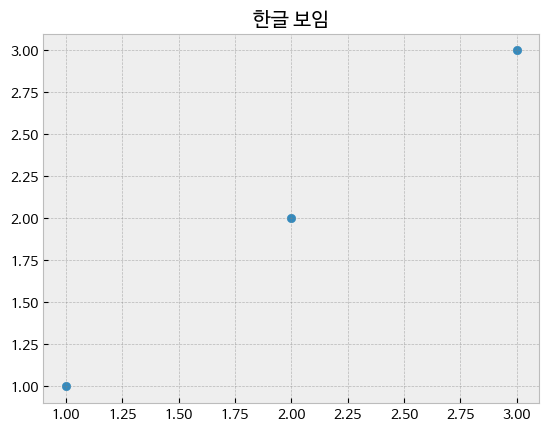

In [ ]:
### 아래 셀 실행 후 한글이 안보이면 런타임 다시 시작(보통 처음엔 잘 안됌)
# "런타임" > "세션 다시 시작"
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

### 그래프 기본 설정
plt.style.use('bmh')
# 인자 종류: ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale','Solarize_Light2', 'tableau-colorblind10', '_classic_test']
plt.grid(True, axis='both', color='grey', alpha=0.5, linestyle='--')   # axis='y'
plt.rc('font', family='NanumBarunGothic')

plt.scatter([1,2,3],[1,2,3])    # plt 한글 확인
plt.title('한글 보임')

### 필수 라이브러리 설치(여기서 기말과제를 참고해라!)

1. requests: 웹 페이지 요청을 보내고 응답을 받기 위해 사용
2.  BeautifulSoup (bs4): HTML 문서를 파싱하여 원하는 데이터를 추출
3. pandas: 데이터를 처리하고 구조화하여 관리
4. matplotlib: 데이터를 시각화하는 데 사용
5. numpy: 데이터 분석 및 시각화에서 숫자 계산

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import numpy as np

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서적 이름   24 non-null     object 
 1   저자      24 non-null     object 
 2   출간년도    24 non-null     int64  
 3   판매지수    24 non-null     int64  
 4   리뷰 총점   24 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ KB
None

데이터프레임 기술통계:
              출간년도           판매지수      리뷰 총점
count    24.000000      24.000000  24.000000
mean   2024.250000  355332.750000   9.608333
std       2.540969  175830.781949   0.307750
min    2013.000000  116793.000000   9.100000
25%    2025.000000  247465.500000   9.300000
50%    2025.000000  333595.500000   9.600000
75%    2025.000000  482256.750000   9.900000
max    2025.000000  735900.000000  10.000000
          출간년도       판매지수  리뷰 총점
count    24.00      24.00  24.00
mean   2024.25  355332.75   9.61
std       2.54  175830.78   0.31
min    201

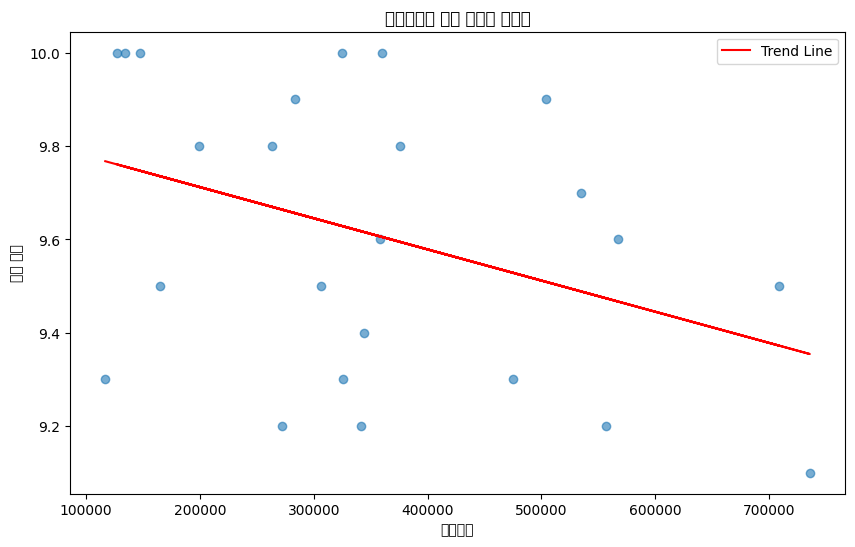

In [8]:
# 1. 웹 페이지 요청: 지정된 URL에 HTTP GET 요청을 보내고, 응답 데이터를 response에 저장

URL = 'https://www.yes24.com/Product/Category/BestSeller?categoryNumber=001&pageNumber=1&pageSize=24' # Yes24 베스트셀러 페이지 URL 지정

response = requests.get(URL) # 지정된 URL에 HTTP GET 요청을 보냅

# 2. 서버에서 받은 응답 (response.text)을 BeautifulSoup 객체로 변환하여 HTML 구조를 쉽게 탐색
soup = BeautifulSoup(response.text, 'html.parser') #'html.parser'는 BeautifulSoup이 HTML을 파싱하는 방식

# 3. 책 정보가 담긴 리스트를 찾습니다.
# 4. <div> 태그 중 클래스가 'itemUnit'인 **모든** 요소 찾기
books = soup.find_all('div', class_='itemUnit') # soup.find_all()을 사용하여 HTML 내에서 div 태그 중 클래스명이 itemUnit인 모든 요소를 찾아 books 리스트에 저장

# 5. '서적 이름', '저자', '출간년도', '판매지수', '리뷰 총점'를 저장할 빈 리스트 data를 초기화
data = []

# 6. 책 정보 리스트에서 데이터 추출 후 리스트에 저장

for book in books:
    title = book.find('a', class_='gd_name').text.strip()  # 서적 이름 추출
    author = book.find('span', class_='authPub info_auth').text.strip() # 저자명 추출
    pub_date = book.find('span', class_='authPub info_date').text.strip()  # 출간년도 추출
    sales_rank = book.find('span', class_='saleNum').text.strip() if book.find('span', class_='saleNum') else "0" # 판매지수 추출
    review_score = book.find('span', class_='rating_grade').find('em').text.strip() if book.find('span', class_='rating_grade') else "0.0" # 리뷰 총점 추출

    # 순회하면서 데이터를 리스트에 추가
    data.append([title, author, pub_date, sales_rank, review_score])

# 7. Pandas 데이터프레임 생성
df = pd.DataFrame(data, columns=['서적 이름', '저자', '출간년도', '판매지수', '리뷰 총점'])

# 8. 데이터 정제(교수님이 지피티로 만든 코드임)
# 8-1. '출간년도'에서 '년' 기준으로 분리하고 첫 번째 요소를 선택
df['출간년도'] = df['출간년도'].str.split('년').str[0].astype(int)
#년 기준으로 split하면 2025 11월 로 만든다. 그리고 첫번째 [0]것을 intger로 만들어줘! 라고 하는 것임)
#이거 한 다음에 다시 df를 봐보면 수정되어 있다.

# 8-2. '판매지수'에서 쉼표(,) 제거 후 숫자로 변환
df['판매지수'] = df['판매지수'].str.replace('판매지수', '').str.replace(',', '').astype(int)
#판매지수를 없애줘. 그리고 ,를 아무것도 없는 것으로 해줘. 그리고 나머지를 정수로 바꿔줘

# 8-3. '리뷰 총점'을 숫자로 변환
df['리뷰 총점'] = df['리뷰 총점'].astype(float)

# 9. 데이터 탐색
print("데이터프레임 정보:")
print(df.info())

print("\n데이터프레임 기술통계:")
print(df.describe())
print(df.describe().round(2))

# 10. 상관관계 통계 분석
correlation = df[['판매지수', '리뷰 총점']].corr().round(2)
print("\n판매지수와 리뷰 총점의 상관관계:")
print(correlation)
correlation1 = df['판매지수'].corr(df['리뷰 총점']).round(2) #이렇게 하면 단일 숫자가 나온다

# 11. 시각화: 판매지수와 리뷰 총점 간의 산점도
plt.figure(figsize=(10, 6))
plt.scatter(df['판매지수'], df['리뷰 총점'], alpha=0.6)

# 회귀선을 위한 선형 회귀 계산
m, b = np.polyfit(df['판매지수'], df['리뷰 총점'], 1)  # 1차 방정식 (y = mx + b) 기울기와 y절편
plt.plot(df['판매지수'], m * df['판매지수'] + b, color="red", label="Trend Line")  # 추세선 추가

#  그래프 설정
plt.legend() #범례표시
plt.title('판매지수와 리뷰 총점의 산점도')
plt.xlabel('판매지수')
plt.ylabel('리뷰 총점')

# 그래프 출력
plt.show()

### 내드라이브의 mypython 폴더에 결과 저장
1. 정제된 데이터를 CSV 파일로 저장
2. 분석결과 중 산점도를 그림파일로 저장

In [ ]:
# 1. 추출한 데이터를 CSV 형식으로 저장(위에서 만든 df 사용)
df.to_csv("/content/drive/MyDrive/mypython/myweb/bestsellers.csv", index=False, encoding="utf-8-sig")


In [ ]:
# 참고: 엑셀 파일로 저장
excel_path = "/content/drive/MyDrive/mypython/myweb/yes24_bestsellers.xlsx"
df.to_excel(excel_path, index=False)

In [ ]:
# 2. 산점도 그림 파일로 저장

plt.figure(figsize=(10, 6))
plt.scatter(df['판매지수'], df['리뷰 총점'], alpha=0.6)

# 회귀선을 위한 선형 회귀 계산
m, b = np.polyfit(df['판매지수'], df['리뷰 총점'], 1)  # 1차 방정식 (y = mx + b) 기울기와 y절편
plt.plot(df['판매지수'], m * df['판매지수'] + b, color="red", label="Trend Line")  # 추세선 추가

#  그래프 설정
plt.legend() #범례표시
plt.title('판매지수와 리뷰 총점의 산점도')
plt.xlabel('판매지수')
plt.ylabel('리뷰 총점')

# 산점도 파일 저장(산점도 파일을 그림으로 저장할 수 있다. )
plt.savefig('/content/drive/MyDrive/mypython/myweb/베스트셀러_판매지수_리뷰총점_산점도.png')